In [41]:
using DelimitedFiles, Plots

In [42]:
sunspot = readdlm("../data/SN_y_tot_V2.0.csv", ';')
select_1945_2020 = filter((s) -> s[1] > 1945 && s[1] < 2021, collect(eachrow(sunspot)))
observations = map((s) -> round(s[2]), select_1945_2020);


In [43]:
# to check that matched with Semih
cvi = readdlm("../estimations/cvi_sunspot_results.csv")
cvmp = readdlm("../estimations/cvmp_sunspot_results.csv")
aismp = readdlm("../estimations/ais_mp_sunspot_results.csv")
nuts = readdlm("../estimations/nuts_sunspot_results.csv");

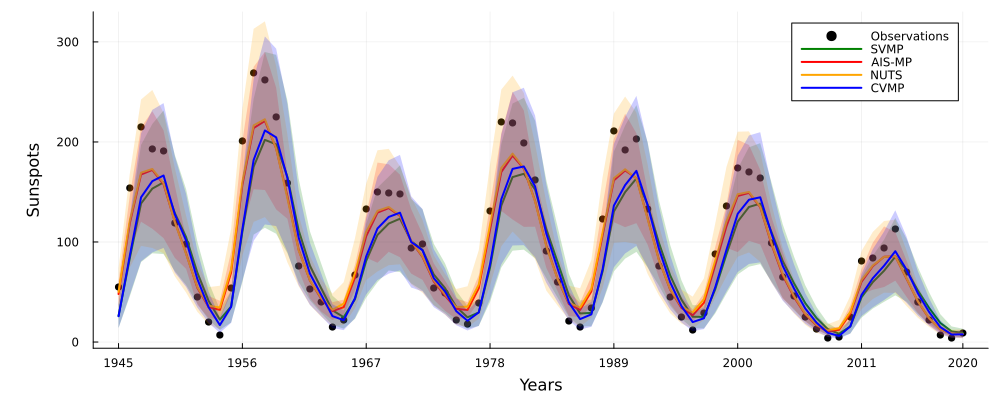

In [50]:
estimation_plot = plot()
scatter!(observations,color=:black,legend=:topright, 
        xtick=([1, 12, 23, 34, 45, 56, 67, 76], [1945, 1956, 1967, 1978, 1989, 2000, 2011, 2020]), 
        xlabel="Years", ylabel="Sunspots", label="Observations", left_margin = 10Plots.mm, bottom_margin = 5Plots.mm)
plot!(cvi[:,1],ribbon=cvi[:,2],label="SVMP", lw=2, size=(1000,400),color=:green,fillalpha=0.2)
plot!(aismp[:, 1],ribbon=aismp[:, 2],label="AIS-MP", lw=2, size=(1000,400),color=:red,fillalpha=0.2)
plot!(nuts[:, 1],ribbon=nuts[:, 2],label="NUTS", lw=2, size=(1000,400),color=:orange,fillalpha=0.2)
plot!(cvmp[:, 1],ribbon=cvmp[:, 2],label="CVMP", lw=2, size=(1000,400),color=:blue,fillalpha=0.2)

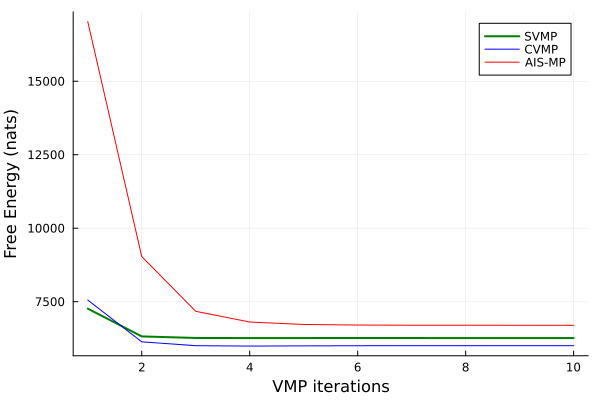

In [51]:
# to check that matched with Semih
cvi_fe = readdlm("../estimations/cvi_fe_sunspot_results.csv")
cvmp_fe = readdlm("../estimations/cvmp_fe_sunspot_results.csv")
aismp_fe = readdlm("../estimations/ais_mp_fe_results.csv")

fe_plot = plot(cvi_fe[1, :], lw=2, xlabel="VMP iterations", ylabel="Free Energy (nats)", color = :green, label = "SVMP")
plot!(cvmp_fe[1, :], color = :blue, label= "CVMP")
plot!(aismp_fe[1, :], color = :red, label = "AIS-MP")

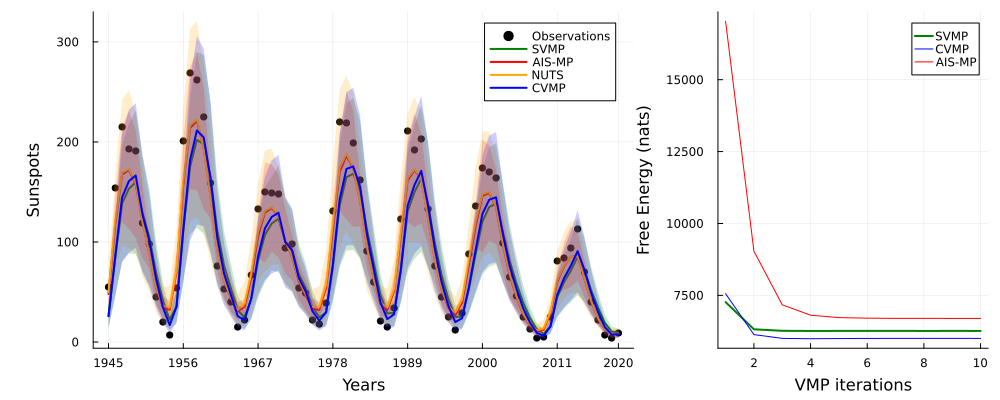

In [57]:
plot(estimation_plot, fe_plot, layout=grid(1, 2, widths=(2/3,1/3)))